In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.legend as mlegend

In [2]:
df = pd.read_csv('./data/precision-recall/precision_recall_data_bp_2022.csv')

In [3]:
df.head()

,precision,recall,terms,label,tool,tissue
0,0.977273,0.273885,44,BEHST(3D),1,Limb
1,0.210526,0.025478,19,BEHST(Linear),1,Limb
2,0.776471,0.420382,85,BEHST(3D+linear),1,Limb
3,0.386100,0.636943,259,GREAT,4,Limb
4,0.428070,0.777070,285,GREAT-gProfiler,5,Limb


In [4]:
df_dict = df.to_dict('index')

In [5]:
print(df_dict[0])

{'precision': 0.9772727272727272, 'recall': 0.2738853503184713, 'terms': 44, 'label': 'BEHST(3D)', 'tool': 1, 'tissue': 'Limb'}


In [6]:
def plot_subplot(axs_x, axs_y, start_row, title):
    ### BEHST
    axs[axs_x, axs_y].scatter(df_dict[start_row]['recall'], df_dict[start_row]['precision'], 
                     s = df_dict[start_row]['terms'], c='royalblue')
    axs[axs_x, axs_y].scatter(df_dict[start_row+1]['recall'], df_dict[start_row+1]['precision'], 
                     s = df_dict[start_row+1]['terms'], marker = '^', c='royalblue')
    axs[axs_x, axs_y].scatter(df_dict[start_row+2]['recall'], df_dict[start_row+2]['precision'], 
                     s = df_dict[start_row+2]['terms'], marker = 's', c='royalblue')

    axs[axs_x, axs_y].scatter(df_dict[start_row+3]['recall'], df_dict[start_row+3]['precision'], s = df_dict[start_row+3]['terms'], marker='o', c='orange')
    axs[axs_x, axs_y].scatter(df_dict[start_row+4]['recall'], df_dict[start_row+4]['precision'], s = df_dict[start_row+4]['terms'], 
                     marker='o', facecolors='none', edgecolors='orange')

    axs[axs_x, axs_y].scatter(df_dict[start_row+5]['recall'], df_dict[start_row+5]['precision'], s = df_dict[start_row+5]['terms'], marker='o', c='green', alpha=0.5)
    axs[axs_x, axs_y].scatter(df_dict[start_row+6]['recall'], df_dict[start_row+6]['precision'], s = df_dict[start_row+6]['terms'], 
                     marker='o', facecolors='none', edgecolors='green')

    axs[axs_x, axs_y].set_title(title)

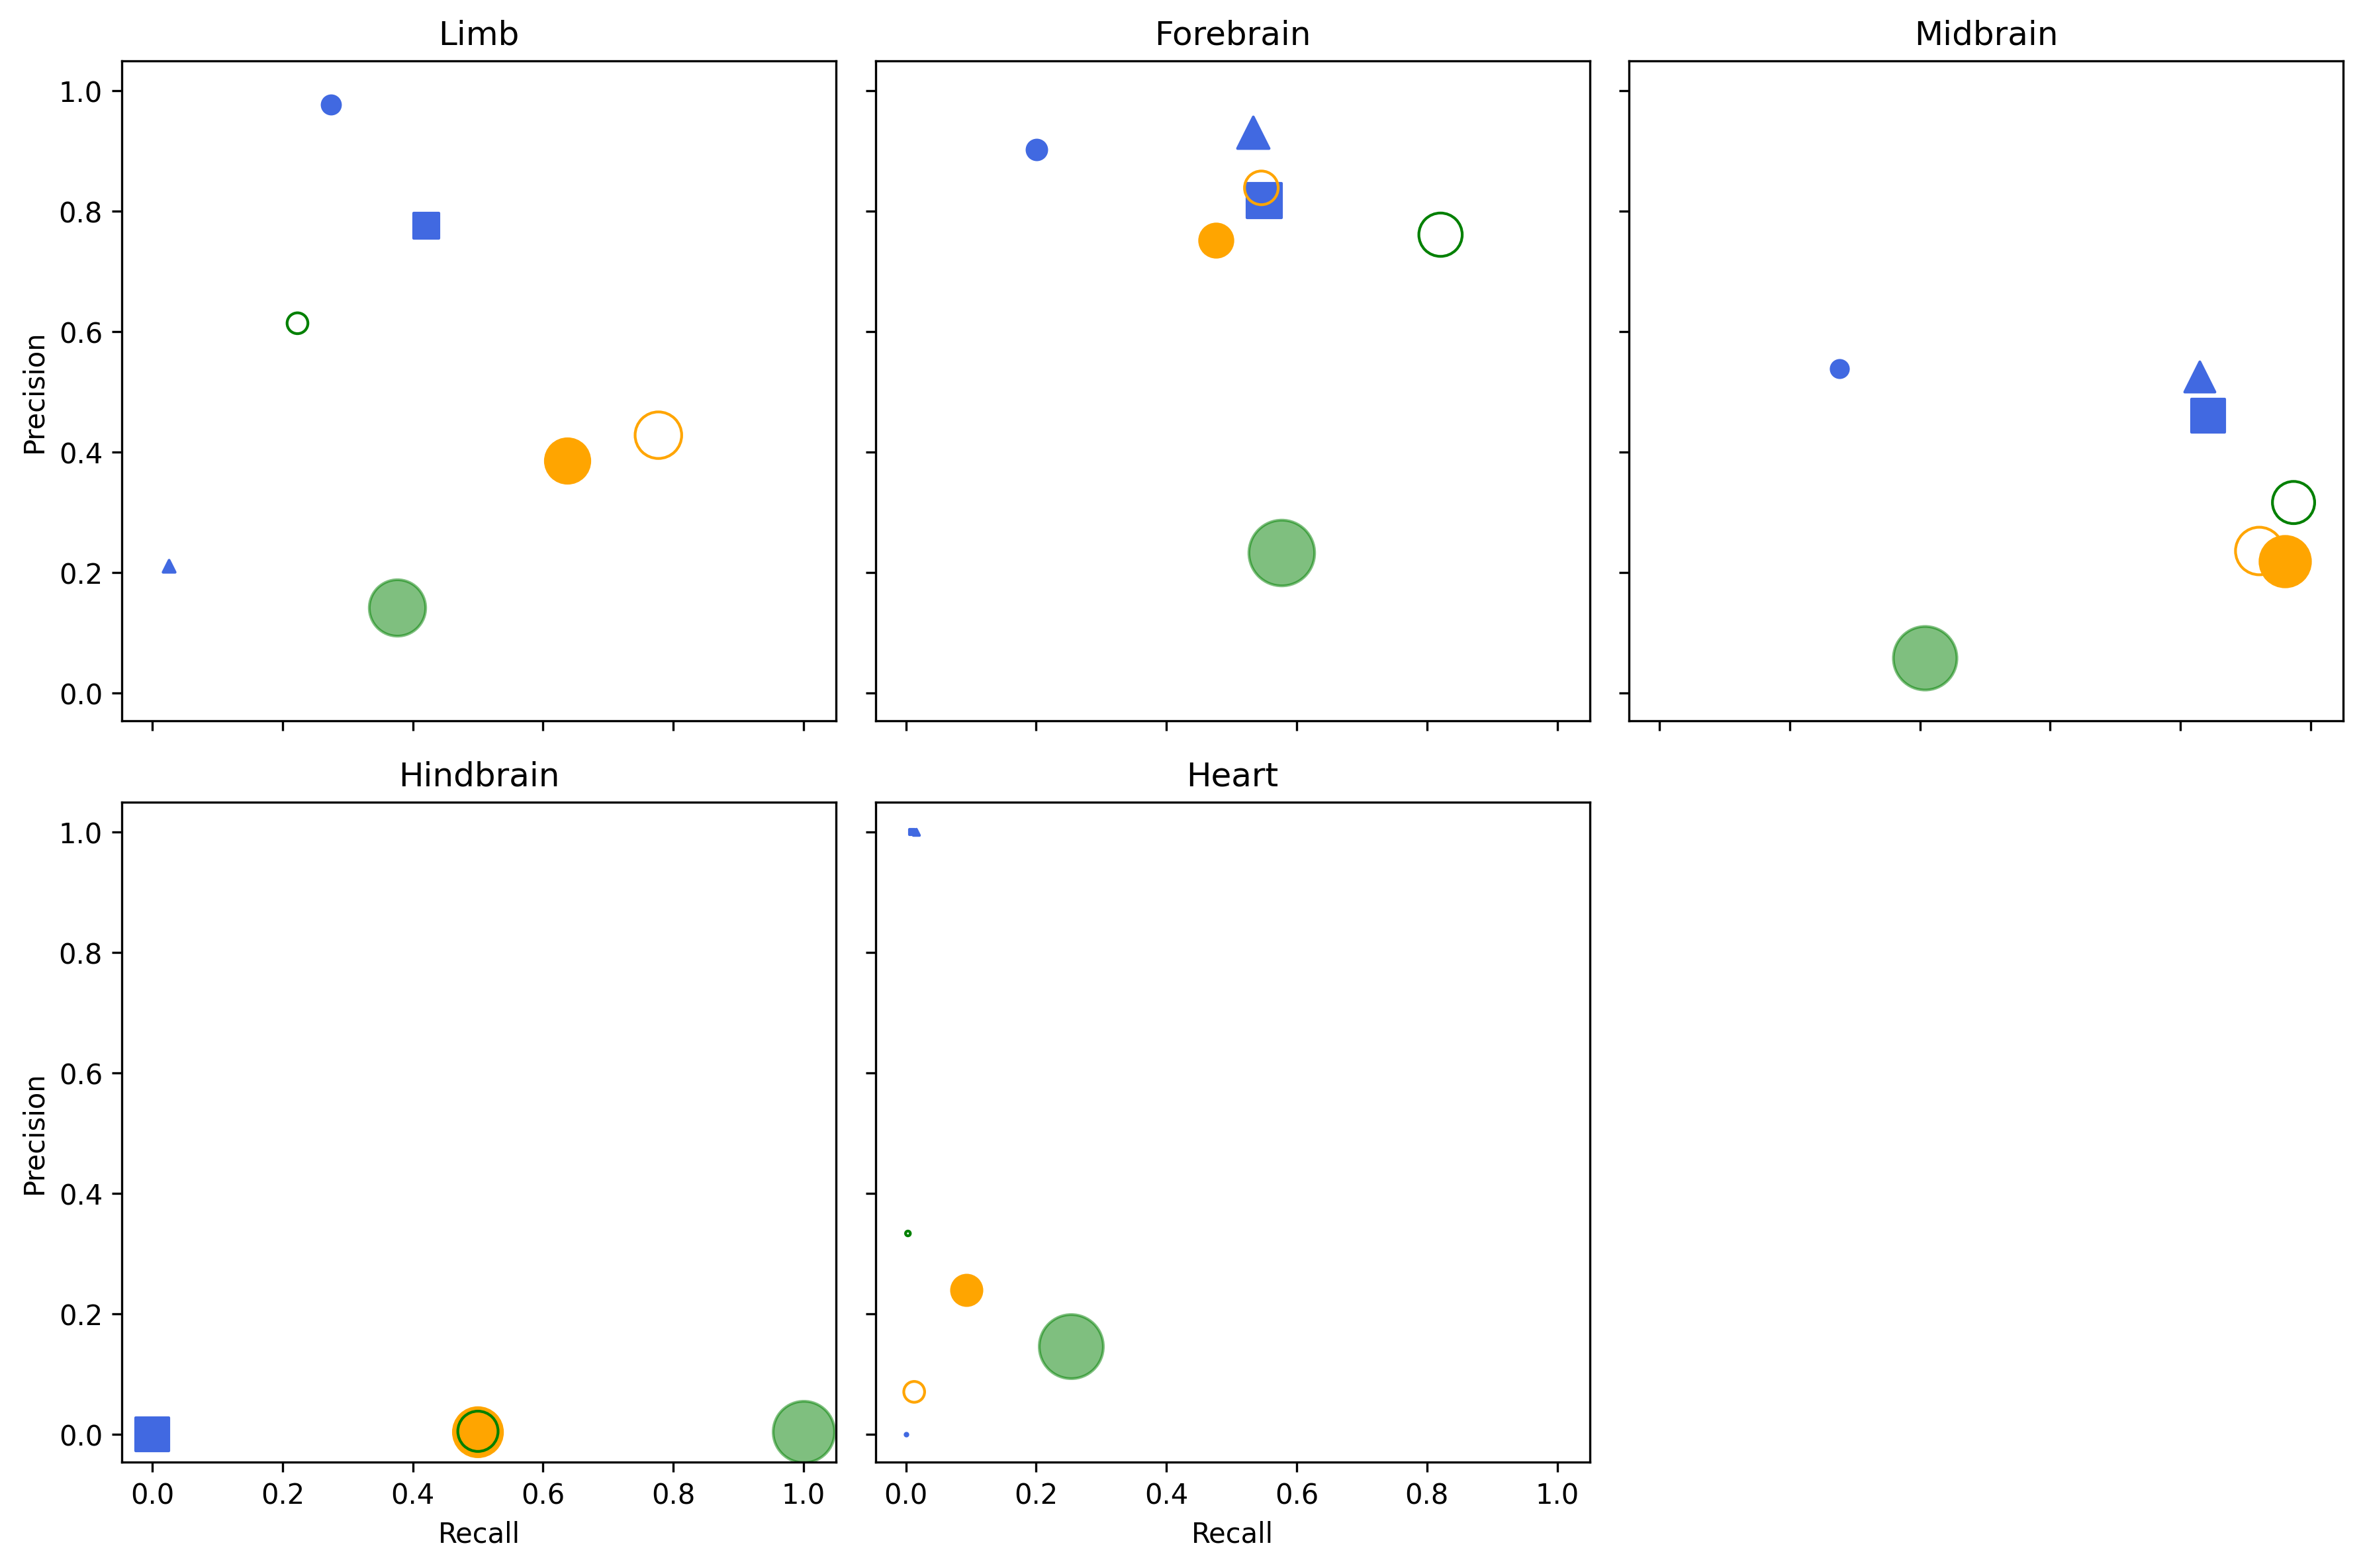

In [7]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, tight_layout=True)
fig.set_figheight(8)
fig.set_figwidth(12)
fig.set_dpi(300)

plot_subplot(0, 0, 0, 'Limb')
plot_subplot(0, 1, 7, 'Forebrain')
plot_subplot(0, 2, 14, 'Midbrain')
plot_subplot(1, 0, 21, 'Hindbrain')
plot_subplot(1, 1, 28, 'Heart')

axs[1,2].set_axis_off()

# set labels
plt.setp(axs[-1, :], xlabel='Recall')
plt.setp(axs[:, 0], ylabel='Precision')
plt.savefig('./precision-recall-plot.png', dpi=300, bbox_inches="tight")

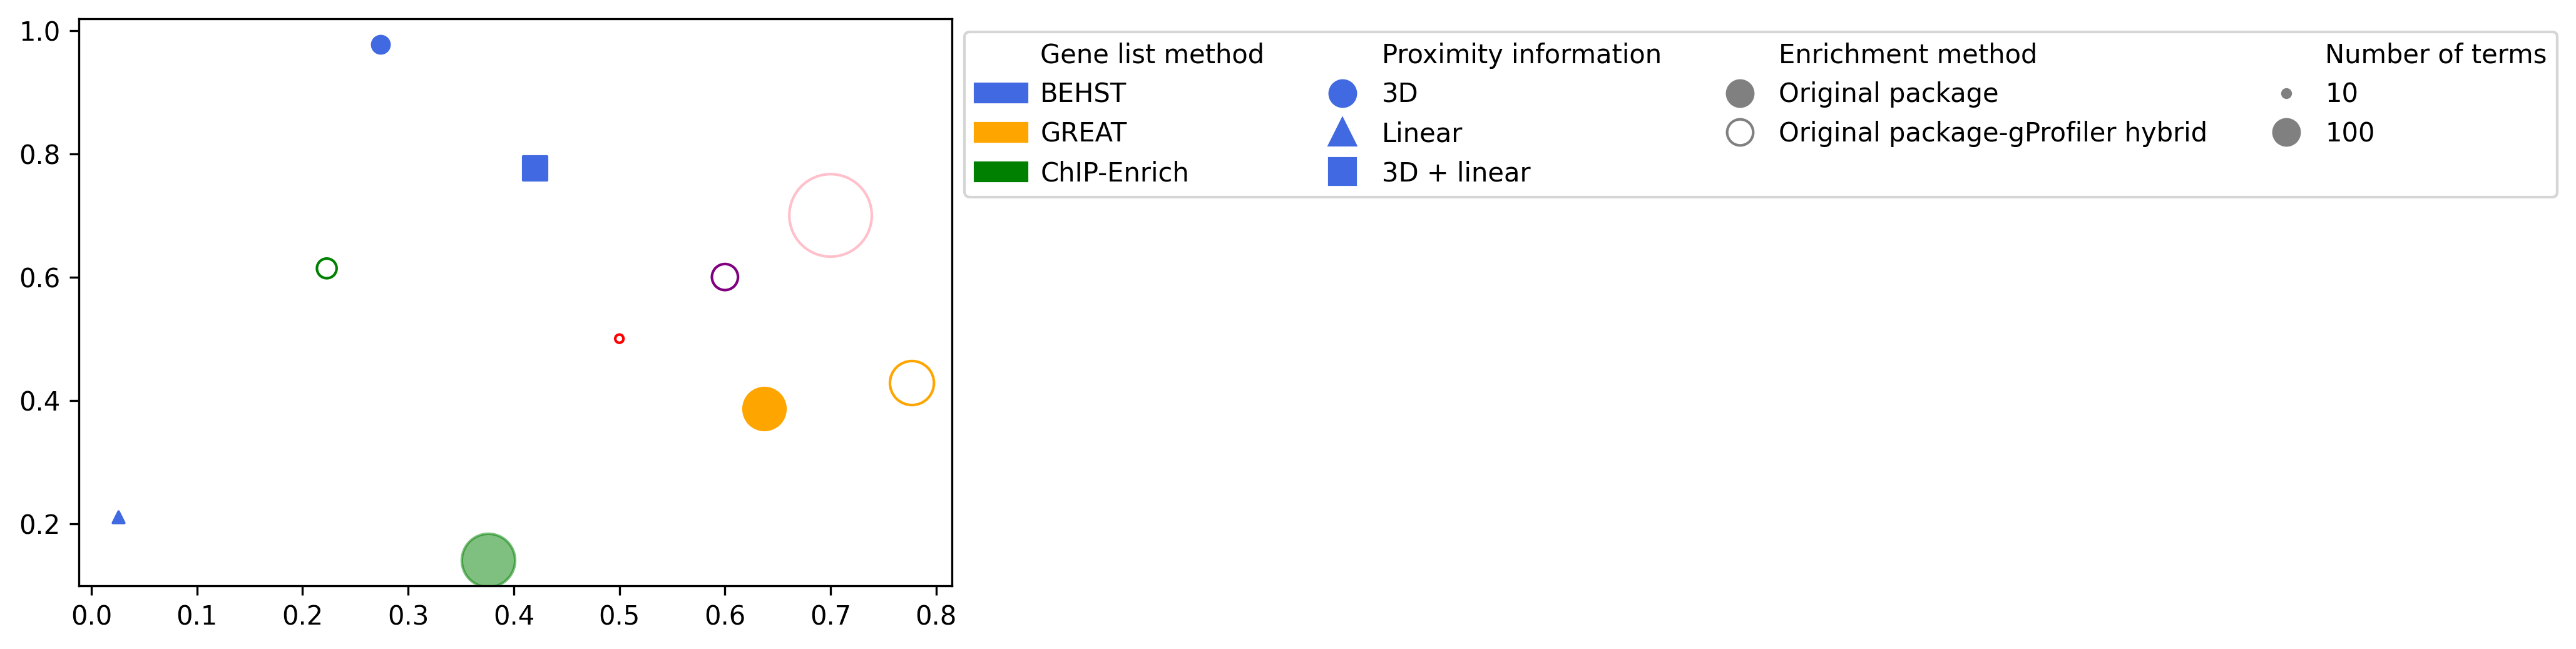

In [10]:
fig = plt.figure(dpi=300)
ax = plt.gca()

start_row=0
ax.scatter(df_dict[start_row]['recall'], df_dict[start_row]['precision'], 
                     s = df_dict[start_row]['terms'], c='royalblue', label='{:.2f}'.format(df_dict[start_row]['terms']))
ax.scatter(df_dict[start_row+1]['recall'], df_dict[start_row+1]['precision'], 
                     s = df_dict[start_row+1]['terms'], marker = '^', c='royalblue')
ax.scatter(df_dict[start_row+2]['recall'], df_dict[start_row+2]['precision'], 
                     s = df_dict[start_row+2]['terms'], marker = 's', c='royalblue')

ax.scatter(df_dict[start_row+3]['recall'], df_dict[start_row+3]['precision'], s = df_dict[start_row+3]['terms'], marker='o', c='orange')
ax.scatter(df_dict[start_row+4]['recall'], df_dict[start_row+4]['precision'], s = df_dict[start_row+4]['terms'], 
                     marker='o', facecolors='none', edgecolors='orange')

ax.scatter(df_dict[start_row+5]['recall'], df_dict[start_row+5]['precision'], s = df_dict[start_row+5]['terms'], marker='o', c='green', alpha=0.5)
ax.scatter(df_dict[start_row+6]['recall'], df_dict[start_row+6]['precision'], s = df_dict[start_row+6]['terms'], 
                     marker='o', facecolors='none', edgecolors='green')

# check relative size, markersize = sqrt(s)
ax.scatter(0.5, 0.5, s = 10, marker='o', facecolors='none', edgecolors='red')
ax.scatter(0.6, 0.6, s = 100, marker='o', facecolors='none', edgecolors='purple')
ax.scatter(0.7, 0.7, s = 1000, marker='o', facecolors='none', edgecolors='pink')

# color
# blank rectangle handle
extra = mpatches.Patch(color='none')
# rectangle for color
blue_patch = mpatches.Patch(color='royalblue', label='BEHST')
orange_patch = mpatches.Patch(color='orange', label='GREAT')
green_patch = mpatches.Patch(color='green', label='ChIP-Enrich')

# BEHST mode
behst_circle =  Line2D([0], [0], marker='o', color='none',
                          markeredgecolor="royalblue", markerfacecolor="royalblue", markersize=10)
behst_rectangle =  Line2D([0], [0], marker='^', color='none',
                          markeredgecolor="royalblue", markerfacecolor="royalblue", markersize=10)
behst_square =  Line2D([0], [0], marker='s', color='none',
                          markeredgecolor="royalblue", markerfacecolor="royalblue", markersize=10)

# GREAT & ChIP-Enrich mode
grey_circle =  Line2D([0], [0],marker='o', label='Original package',color='none',
                          markeredgecolor="grey",markerfacecolor="grey", markersize=10)
grey_hollow_circle =  Line2D([0], [0],marker='o', label='Original package-gProfiler hybrid',color='none',
                          markeredgecolor="grey",markerfacecolor="none", markersize=10)

# Number of terms
small_circle =  Line2D([0], [0],marker='o', color='none',
                          markeredgecolor="grey",markerfacecolor="grey", markersize=np.sqrt(10))
large_circle =  Line2D([0], [0],marker='o', color='none',
                          markeredgecolor="grey",markerfacecolor="grey", markersize=10)
# not plotted, will overlap with the other two circles
extra_large_circle =  Line2D([0], [0],marker='o', color='none',
                          markeredgecolor="royalblue",markerfacecolor="royalblue", markersize=np.sqrt(1000))



leg_handles = handles=[extra, blue_patch, orange_patch, green_patch,
                       extra, behst_circle, behst_rectangle, behst_square,
                       extra, grey_circle, grey_hollow_circle, 
                       extra, small_circle, large_circle]

leg_labels = ['Gene list method', 'BEHST', 'GREAT', 'ChIP-Enrich',
              'Proximity information', '3D', 'Linear', '3D + linear',
             'Enrichment method', 'Original package',  'Original package-gProfiler hybrid', 
             'Number of terms', '10', '100']

ax.legend_ = mlegend.Legend(ax, leg_handles, leg_labels, ncol=4, handletextpad=0.5,
                           bbox_to_anchor=(1, 1))
plt.savefig('./precision-recall-legend.png', dpi=300, bbox_inches="tight")